# Classification d'images avec tensorflow 

#### Importer les librairies

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

#### Importer les jeux de données

In [2]:
#j'importe le dataset fashion_minst de tensorflow
data_image = tf.keras.datasets.fashion_mnist 

#dans ce dataset nous disposons deja des données d'entrainements(60 mil images) et de tests(10 mil images)
#je charge les images
(images, targets), (images_test, targets_test) = data_image.load_data() 

#### Explorons le jeu de donnée

In [3]:
# taille des images
images.shape, targets.shape, images_test.shape, targets_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Notre jeu de donnée se presente sous la forme de quatre tableaux qui contiennent chacune les données d'entrainement(x_tain, y_train) et les données tests(x_test, y_test). chaque image est un tableau numpy de 28 lignes et 28 colonnes. Les images contenus dans les tableaux sont representées par des valeurs sous forme de pixel allant de 0 à 255. Chaque image est etiquétée de 0 à 9 ce qui nous donne 10 classes.

In [4]:
#nom des classes
classe_nom = ['T-shirt/haut', 'Pantalon', 'Pullover', 'Robe', 'Manteau',
               'Sandale', 'chemise', 'Baskets', 'Sac', 'Bottine']

#### Prétraitement des données

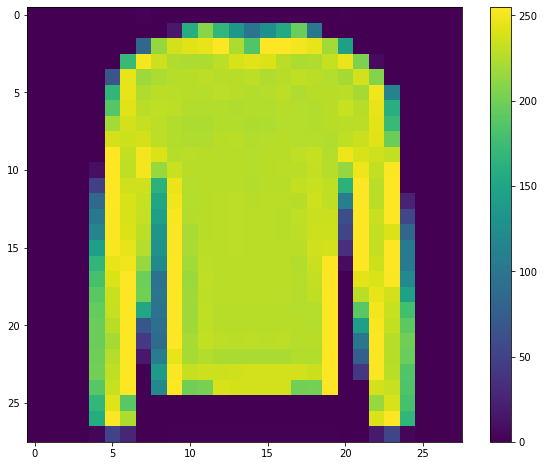

In [5]:
#visualisons la 15000 ieme image
plt.figure(figsize = (10, 8))
plt.imshow(images[15000])
plt.colorbar()
plt.grid(False)
plt.show()

ici on voit que les valeurs des pixels sont comprises entre 0 et 255, donc nous devons les normaliser c'est a dire les mettres à une echelle de 0 à 1, avant de les transmettre a notre modèle(cela nous permettra d'avoir de meilleurs resultats). Donc pour ce faire, on divise chaque valeur de l'image par 255

In [6]:
#normalisons les images 
images = images / 255.0
images_test = images_test / 255.0

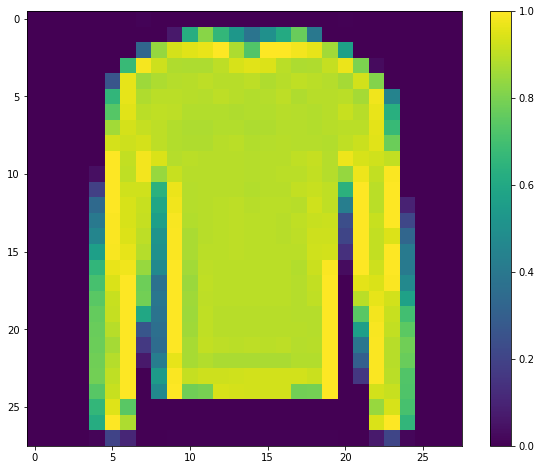

In [7]:
#visualisons une images normalisée  
plt.figure(figsize = (10, 8))
plt.imshow(images[15000])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#affichons sa classe
classe_nom[targets[15000]]

'Pullover'

Cette image appartient à la classe 'Pullover'. Nous remarquons que les valeurs de pixels qui allait de 0 à 255 ont été normalisé et varie maintenant de 0.0000 à 0.0035.
Visualisons à present les 30 premieres images de notre d'entrainement et affichons leurs differentes classes.

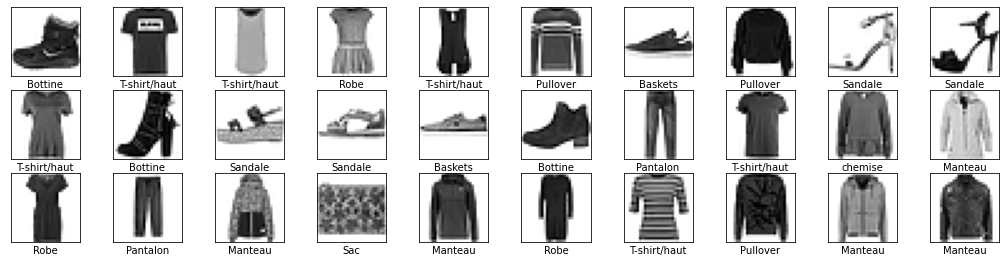

In [9]:
plt.figure(figsize=(18,15))
for i in range(30):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(classe_nom[targets[i]])
plt.show()

#### Construction du modèle

In [10]:
# initialisons notre modele
model = tf.keras.models.Sequential()

# nous devons configurer les couches de notre model.ajoutons la premiere couche
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

la première couche flatten transforme le format des images d'un tableau de 28 par 28 pixels en un tableau de 28 * 28 = 784 pixels.
cette couche va permettre d'applatir les données. en plus claire , nous savons que les images sont représentées en maths par des matrices, et donc les reseaux de neuronnes prennent en entrées des vecteurs donc on va transformer l'image de taille 28x28 en un vecteur de taille 784

In [11]:
#ensuite ajoutons deux autres couches
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

Nous avons choisi une couche de 256 neuronnes et l'autre 128 neuronnes. ces couches sont connectées

In [12]:
#ajoutons ensuite une derniere couche
model.add(tf.keras.layers.Dense(10))
#cette derniere couche renvoit un tableau logit d'une longueur de 10, Chaque nœud contient un score qui indique que l'image actuelle appartient à l'une des 10 classes.

In [13]:
#compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Nous allons compiler le modele.
Fonction de perte(loss) : mesure la précision du modèle pendant l'entraînement. Vous voulez minimiser cette fonction pour "orienter" le modèle dans la bonne direction.
Optimiseur : c'est ainsi que le modèle est mis à jour en fonction des données qu'il voit et de sa fonction de perte.
Métriques : utilisées pour surveiller les étapes de formation et de test. L'exemple suivant utilise la precision , la fraction des images qui sont correctement classées.

#### Entrainer le modele

Pour entrainer le modele, on lui fournit des données d'entrainnement(images),le modele s'entraine à associer des images à des etiquettes

In [14]:
#entrainement sur les données d'entrainement
model.fit(images, targets, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4782 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3608 - accuracy: 0.8671
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3244 - accuracy: 0.8796
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3013 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2816 - accuracy: 0.8949
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2686 - accuracy: 0.8996
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2559 - accuracy: 0.9033
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2468 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2344 - accuracy: 0.9122
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.225

Au fur et à mesure que le modèle s'entraîne, les mesures de perte et de précision sont affichées. Ce modèle atteint une précision d'environ 0,91 (91 %) sur les données d'entraînement.

#### Evaluons la précision du modèle

In [15]:
#precision sur les données tests
test_loss, test_acc = model.evaluate(images_test,  targets_test, verbose=2)
print('\nPrécision du modèle:', test_acc)

313/313 - 1s - loss: 0.3511 - accuracy: 0.8839

Précision du modèle: 0.883899986743927


Notre modèle construit a une precision de 0.77% soit inferieure a celle des données d'entrainement.
ainsi, on fait 0,87 - 0,77 pour trouver le surapprentissage. Le surapprentissage se produit lorsqu'un modèle d'apprentissage automatique fonctionne moins bien sur de nouvelles entrées inédites que sur les données d'entraînement. Un modèle surajusté tient compte du bruit et des détails dans l'ensemble de données d'entraînement à un point où il a un impact négatif sur les performances du modèle sur les nouvelles données.Nous n'allons pas traiter ceci, voici un lien pour eviter le surapprentissage https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting

#### Prédiction

Nous allons utiliser le modèle formé pour faire des prédictions sur certaines images. Nous allons ajouter une derniere couche softmax pour convertir les sorties en probabilités, qui seront plus faciles à interpréter

In [16]:
#la fonction softmax génère un vecteur de probabilités (normalisées) avec une valeur pour chaque classe possible.
probabilite = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probabilite.predict(images_test)

Ici, le modèle a prédit l'étiquette pour chaque image dans l'ensemble des donnée test.

In [31]:
#Jetons un coup d'œil à la dixieme prédiction :
predictions[15]

array([8.7092391e-12, 1.0000000e+00, 7.9621607e-13, 3.1583177e-08,
       9.1928887e-10, 3.4713647e-17, 1.3511441e-10, 9.6085946e-21,
       1.2883688e-13, 7.8894310e-17], dtype=float32)

Une prédiction est un tableau de 10 nombres. Ils représentent la "confiance" du modèle que l'image correspond à chacun des 10 articles vestimentaires différents. Vous pouvez voir quelle étiquette a la valeur de confiance la plus élevée

In [34]:
#etiquette ayant la valeur de prediction la plus elevée
np.argmax(predictions[15])

1

le modèle est le plus confiant que cette image est une bottine(classe_nom = 1). 

In [36]:
#verification de l'etiquette
targets_test[15]

1

L'examen de l'étiquette d'essai montre que cette classification est correcte .
Représentons graphiquement l'ensemble des 10 prédictions de classe

In [37]:
#créons une fonction pour visualiser les images predictent
def plot_image(i, predictions_array, vrai_test, img):
  vrai_test, img = vrai_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])             
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == vrai_test:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classe_nom[predicted_label],
                                100*np.max(predictions_array),
                                classe_nom[vrai_test]),
                                color=color)

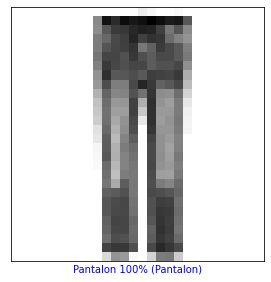

In [40]:
#on lui passe une image (dans mon exemple je prend la 15ieme)
i = 15
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plot_image(i, predictions[i], targets_test, images_test)
plt.show()

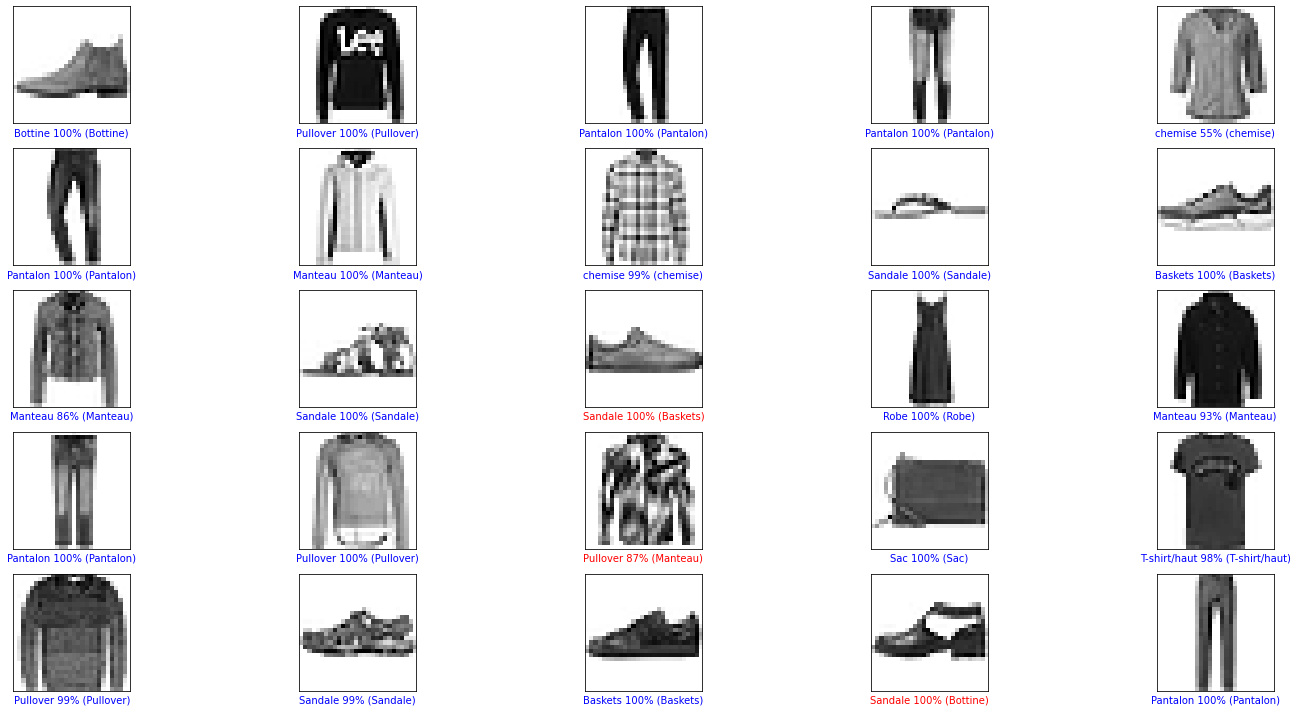

In [39]:
#affichons plusieurs images predites
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], targets_test, images_test)
plt.tight_layout()
plt.show()

Pour plus d'informations sur la classification des images avec tensorflow et keras, 